In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [32]:
print("Customer table head:")
print(customers.head(), "\n")
print("Product table head:")
print(products.head(), "\n")
print("Transaction table head:")
print(transactions.head())

Customer table head:
  CustomerID        CustomerName         Region SignupDate  SignupYear
0      C0001    Lawrence Carroll  South America 2022-07-10        2022
1      C0002      Elizabeth Lutz           Asia 2022-02-13        2022
2      C0003      Michael Rivera  South America 2024-03-07        2024
3      C0004  Kathleen Rodriguez  South America 2022-10-09        2022
4      C0005         Laura Weber           Asia 2022-08-15        2022 

Product table head:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transaction table head:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112  

In [7]:
print("Missing values in Customers:")
print(customers.isnull().sum(), "\n")
print("Missing values in Products:")
print(products.isnull().sum(), "\n")
print("Missing values in Transaction:")
print(transactions.isnull().sum())

Missing values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Missing values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Missing values in Transaction:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [8]:
print("Unique Regions:", customers['Region'].unique())
print(customers['Region'].value_counts())

Unique Regions: ['South America' 'Asia' 'North America' 'Europe']
South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64


In [9]:
print("Product Categories:", products['Category'].unique())
print(products['Category'].value_counts())

Product Categories: ['Books' 'Electronics' 'Home Decor' 'Clothing']
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: Category, dtype: int64


In [10]:
print("Transaction Date Range:", transactions['TransactionDate'].min(), "to", transactions['TransactionDate'].max())
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

Transaction Date Range: 2023-12-30 15:29:12 to 2024-12-28 11:00:00


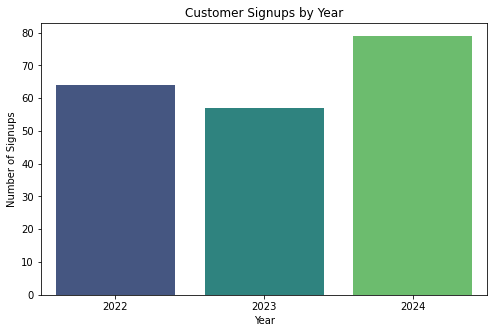

Year-over-Year Change in Customer Signups (%):
2022          NaN
2023   -10.937500
2024    38.596491
Name: SignupYear, dtype: float64


In [36]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trend = customers['SignupYear'].value_counts().sort_index()


signup_trend_percentage_change = signup_trend.pct_change() * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=signup_trend.index, y=signup_trend.values, palette='viridis')
plt.title('Customer Signups by Year')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()

print("Year-over-Year Change in Customer Signups (%):")
print(signup_trend_percentage_change)


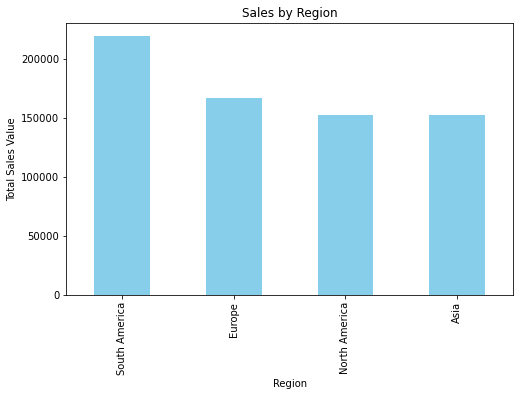

In [12]:
region_sales = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].sum()
region_sales.sort_values(ascending=False).plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Value')
plt.show()

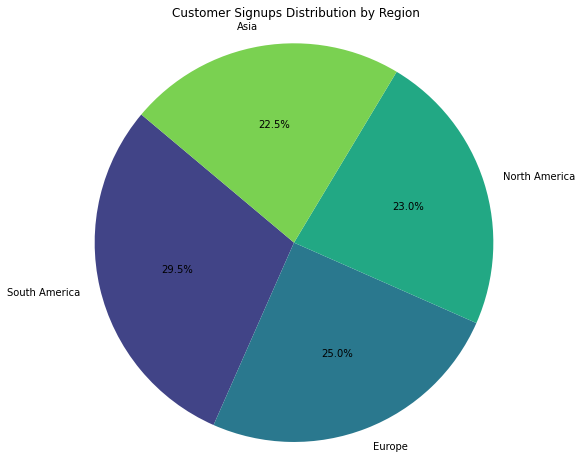

South America contributes the highest number of signups, accounting for 29.50% of the total customer base.


In [25]:
region_counts = customers['Region'].value_counts()
total_customers = customers['Region'].count()

top_region = region_counts.idxmax()
top_region_percentage = (region_counts[top_region] / total_customers) * 100

plt.figure(figsize=(8, 8))
plt.pie(region_counts.values, labels=region_counts.index, autopct='%1.1f%%', startangle=140, 
        colors=sns.color_palette('viridis', len(region_counts)))
plt.title('Customer Signups Distribution by Region')
plt.axis('equal')  
plt.show()

print(f"{top_region} contributes the highest number of signups, accounting for {top_region_percentage:.2f}% of the total customer base.")



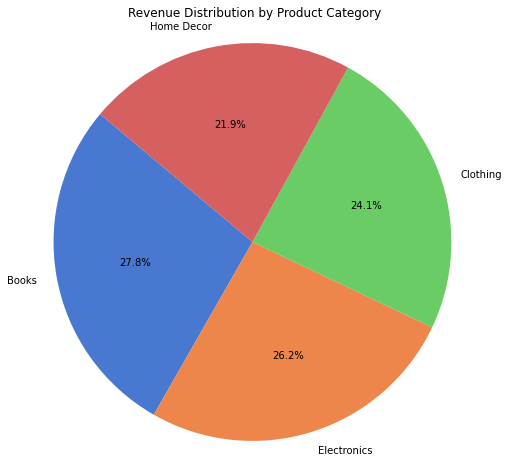

The Books category generates the highest revenue, contributing 27.85% of total sales.


In [21]:
transactions_products = transactions.merge(products, on='ProductID')

category_revenue = transactions_products.groupby('Category')['TotalValue'].sum()
total_revenue = category_revenue.sum()

plt.figure(figsize=(8, 8))
category_revenue_sorted = category_revenue.sort_values(ascending=False)
plt.pie(category_revenue_sorted.values, labels=category_revenue_sorted.index, 
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted', len(category_revenue_sorted)))
plt.title('Revenue Distribution by Product Category')
plt.axis('equal')  
plt.show()

top_category = category_revenue.idxmax()
top_category_percentage = (category_revenue[top_category] / total_revenue) * 100
print(f"The {top_category} category generates the highest revenue, contributing {top_category_percentage:.2f}% of total sales.")


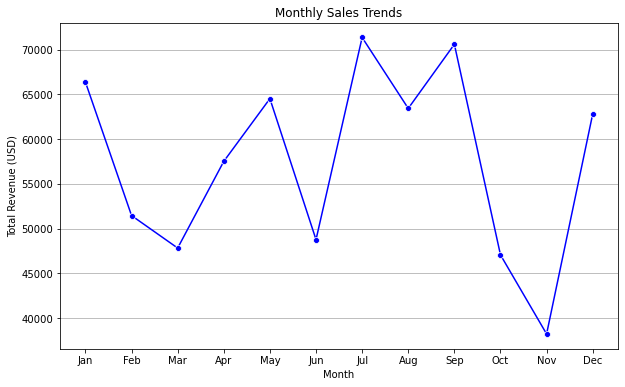

In [37]:
transactions['Month'] = transactions['TransactionDate'].dt.month

monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='b')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()



peak_month = monthly_sales.idxmax()


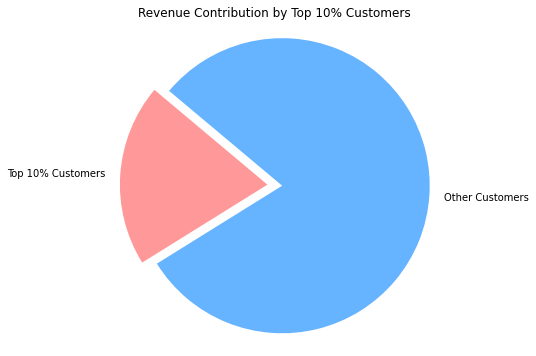

The top 10% of customers contribute 19.97% of the revenue.


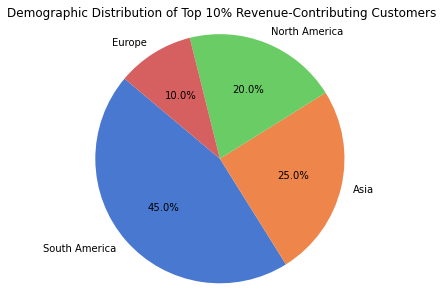

In [34]:
customer_revenue = transactions.groupby('CustomerID')['TotalValue'].sum()


top_10_percent_threshold = customer_revenue.quantile(0.90)
top_customers_revenue = customer_revenue[customer_revenue >= top_10_percent_threshold].sum()


labels = ['Top 10% Customers', 'Other Customers']
sizes = [top_customers_revenue, customer_revenue.sum() - top_customers_revenue]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, startangle=140, explode=(0.1, 0))
plt.title('Revenue Contribution by Top 10% Customers')
plt.axis('equal')  
plt.show()


high_value_percentage = (top_customers_revenue / customer_revenue.sum()) * 100
print(f"The top 10% of customers contribute {high_value_percentage:.2f}% of the revenue.")


top_10_customers = customer_revenue[customer_revenue >= top_10_percent_threshold].index
top_10_demographics = customers[customers['CustomerID'].isin(top_10_customers)]['Region'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(top_10_demographics.values, labels=top_10_demographics.index, autopct='%1.1f%%', 
        startangle=140, colors=sns.color_palette('muted', len(top_10_demographics)))
plt.title('Demographic Distribution of Top 10% Revenue-Contributing Customers')
plt.axis('equal')
plt.show()


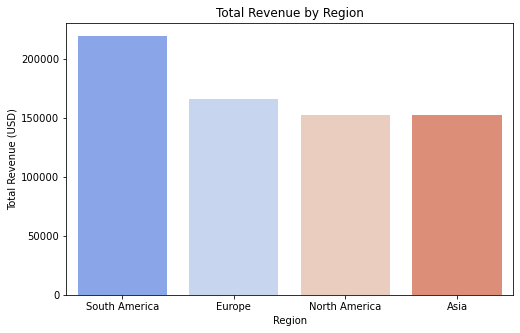

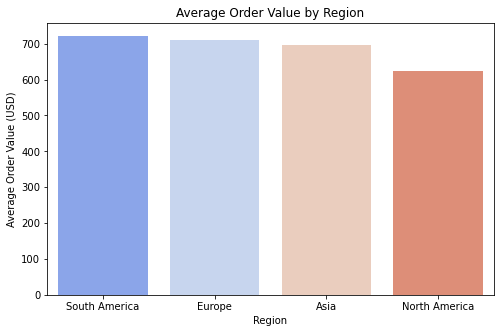

South America accounts for the highest revenue, with an average order value of $721.55 per transaction.


In [31]:
region_transactions = transactions.merge(customers, on='CustomerID')

region_revenue = region_transactions.groupby('Region')['TotalValue'].sum()
region_avg_order_value = region_transactions.groupby('Region')['TotalValue'].mean()


plt.figure(figsize=(8, 5))
region_revenue_sorted = region_revenue.sort_values(ascending=False)
sns.barplot(x=region_revenue_sorted.index, y=region_revenue_sorted.values')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue (USD)')
plt.show()


plt.figure(figsize=(8, 5))
region_avg_order_value_sorted = region_avg_order_value.sort_values(ascending=False)
sns.barplot(x=region_avg_order_value_sorted.index, y=region_avg_order_value_sorted.values)
plt.title('Average Order Value by Region')
plt.xlabel('Region')
plt.ylabel('Average Order Value (USD)')
plt.show()

top_region = region_revenue.idxmax()
avg_order_value_top_region = region_avg_order_value[top_region]
print(f"{top_region} accounts for the highest revenue, with an average order value of ${avg_order_value_top_region:.2f} per transaction.")
